In [1]:
import numpy as np 
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 
import os
import keras


In [10]:
base_dir = './flowers/'
img_size = 224
batch = 64


In [11]:
# Create a data augmentor 
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, 
								zoom_range=0.2, horizontal_flip=True, 
								validation_split=0.2) 

test_datagen = ImageDataGenerator(rescale=1. / 255, 
								validation_split=0.2) 

# Create datasets 
train_datagen = train_datagen.flow_from_directory(base_dir, 
												target_size=( 
													img_size, img_size), 
												subset='training', 
												batch_size=batch) 
test_datagen = test_datagen.flow_from_directory(base_dir, 
												target_size=( 
													img_size, img_size), 
												subset='validation', 
												batch_size=batch) 


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [12]:
# # modelling starts using a CNN. 

model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', 
				activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 


model.add(Conv2D(filters=64, kernel_size=(3, 3), 
				padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 


model.add(Conv2D(filters=64, kernel_size=(3, 3), 
				padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
				padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dense(5, activation="softmax")) 


In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

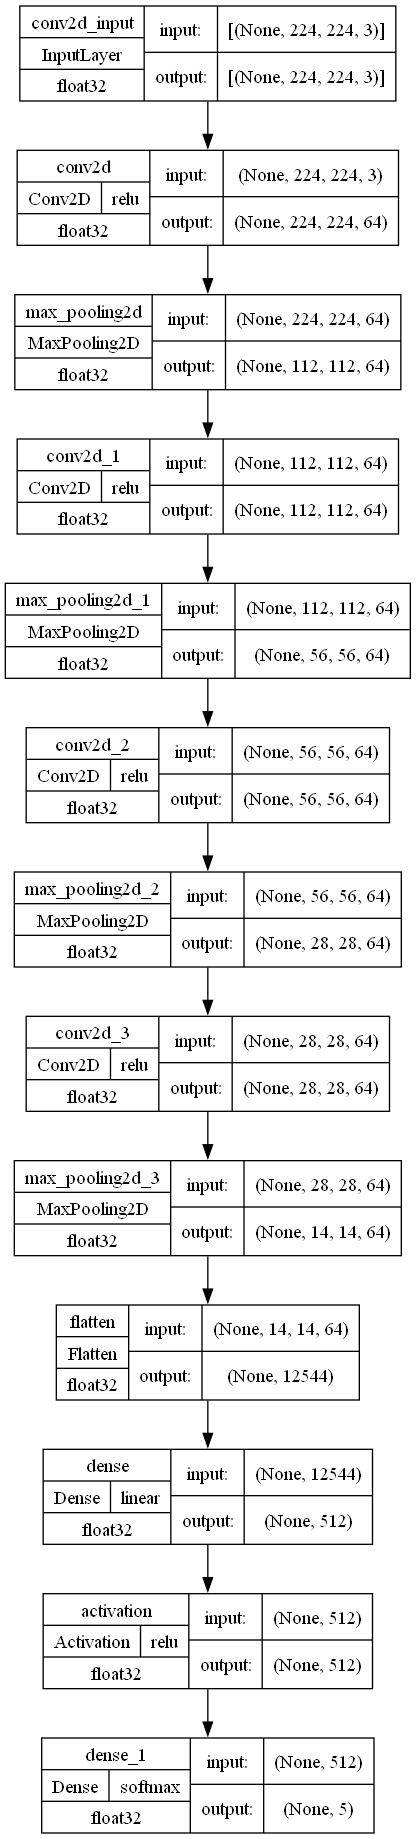

In [14]:
keras.utils.plot_model( 
	model, 
	show_shapes = True, 
	show_dtype = True, 
	show_layer_activations = True
)


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
			loss='categorical_crossentropy', metrics=['accuracy']) 


In [16]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


Epoch 1/30
55/55 [==============================] - 348s 6s/step - loss: 1.4097 - accuracy: 0.3879 - val_loss: 1.2137 - val_accuracy: 0.4756
Epoch 2/30
55/55 [==============================] - 340s 6s/step - loss: 1.1418 - accuracy: 0.5409 - val_loss: 1.0897 - val_accuracy: 0.5767
Epoch 3/30
55/55 [==============================] - 309s 6s/step - loss: 1.1205 - accuracy: 0.5583 - val_loss: 1.0259 - val_accuracy: 0.6140
Epoch 4/30
55/55 [==============================] - 267s 5s/step - loss: 0.9953 - accuracy: 0.6057 - val_loss: 1.0079 - val_accuracy: 0.6198
Epoch 5/30
55/55 [==============================] - 268s 5s/step - loss: 0.9085 - accuracy: 0.6569 - val_loss: 0.9097 - val_accuracy: 0.6488
Epoch 6/30
55/55 [==============================] - 267s 5s/step - loss: 0.9132 - accuracy: 0.6459 - val_loss: 1.2063 - val_accuracy: 0.5035
Epoch 7/30
55/55 [==============================] - 270s 5s/step - loss: 0.9587 - accuracy: 0.6182 - val_loss: 0.8948 - val_accuracy: 0.6558
Epoch 8/30
55

In [17]:
from tensorflow.keras.models import load_model 
model.save('Model.h5') 

# load model 
savedModel=load_model('Model.h5')


c:\Users\Sheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
train_datagen.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 [==============================] - 0s 293ms/step
[[0. 0. 0. 1. 0.]]
sunflower


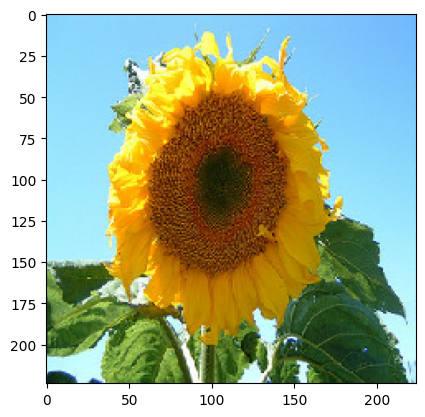

In [19]:
from keras.preprocessing import image 

#Creating list for mapping 
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip'] 

#Input image 
test_image = image.load_img(r'C:\Users\Sheha\Downloads\145303599_2627e23815_n.jpg',target_size=(224,224)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = savedModel.predict(test_image) 
print(result) 

#Mapping result array with the main name list 
i=0
for i in range(len(result[0])): 
  if(result[0][i]==1): 
  	print(list_[i])
    #break
